In [12]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

In [9]:
tfd = tfp.distributions

# Define a single scalar Normal distribution.
dist = tfd.Normal(loc=0., scale=1.)

# Evaluate the cdf at 1, returning a scalar.
print(dist.cdf(0.))

tf.Tensor(0.5, shape=(), dtype=float32)


In [130]:
level_cdf = [ 0.04, 0.11, 0.23, 0.40, 0.60, 0.77, 0.89, 0.96]
levels = np.array(
    [
        [ 87, ],
        [ 80, ],
        [ 72, ],
        [ 62, ],
        [ 49, ],
        [ 36, ],
        [ 24, ],
        [ 18, ],
    ]
)



In [131]:
dist = tfp.distributions.Normal(loc=0., scale=1.)
z_score = dist.quantile(level_cdf)
z_score

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([-1.750686  , -1.2265282 , -0.7388468 , -0.2533471 ,  0.25334716,
        0.7388468 ,  1.2265282 ,  1.7506858 ], dtype=float32)>

In [354]:
x_train = levels
#y_train = np.expand_dims(level_cdf, axis=1)
y_train = np.expand_dims(z_score, axis=1)
y_train

array([[-1.750686  ],
       [-1.2265282 ],
       [-0.7388468 ],
       [-0.2533471 ],
       [ 0.25334716],
       [ 0.7388468 ],
       [ 1.2265282 ],
       [ 1.7506858 ]], dtype=float32)

In [372]:
class NormalLayer(tf.keras.layers.Layer):
  def __init__(self):
    super(NormalLayer, self).__init__()
    #self.num_outputs = num_outputs
    #self.dist = tfp.distributions.Normal(loc=0., scale=1.)

  def build(self, input_shape):
    self.mu = self.add_weight(shape=(), 
                               initializer=tf.constant_initializer(np.array(50)),
                               name='mu',
                               trainable=True)
    self.sigma = self.add_weight(shape=(),
                               initializer=tf.constant_initializer(np.array(20)),
                               name='sigma',
                               trainable=True)
    self.w2 = self.add_weight(shape=(),
                               initializer=tf.constant_initializer(np.array(0)),
                               name='w2',
                               trainable=True)
    self.w3 = self.add_weight(shape=(),
                               initializer=tf.constant_initializer(np.array(0)),
                               name='w3',
                               trainable=True)
    self.w4 = self.add_weight(shape=(),
                               initializer=tf.constant_initializer(np.array(0)),
                               name='w4',
                               trainable=True)
    self.w5 = self.add_weight(shape=(),
                               initializer=tf.constant_initializer(np.array(0)),
                               name='w5',
                               trainable=True)

  def call(self, input):
    #return dist.cdf(input)
    #return input*self.mu + self.sigma
    #return self.dist.cdf((input-self.mu)/self.sigma)
    return -(input-self.mu)/self.sigma \
           + self.w2*(input-self.mu)**2 \
           + self.w3*(input-self.mu)**3 \
           + self.w4*(input-self.mu)**4 \
           + self.w5*(input-self.mu)**5


In [373]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

inputs = Input((1))
outputs = NormalLayer()(inputs)
model = Model(inputs, outputs)
opt = Adam(lr=0.001)

model.compile(loss='mse', optimizer=opt)

In [374]:
normallayer = model.layers[1]

In [375]:
normallayer.mu, normallayer.sigma

(<tf.Variable 'normal_layer_31/mu:0' shape=() dtype=float32, numpy=50.0>,
 <tf.Variable 'normal_layer_31/sigma:0' shape=() dtype=float32, numpy=20.0>)

In [376]:
normallayer.weights

[<tf.Variable 'normal_layer_31/mu:0' shape=() dtype=float32, numpy=50.0>,
 <tf.Variable 'normal_layer_31/sigma:0' shape=() dtype=float32, numpy=20.0>,
 <tf.Variable 'normal_layer_31/w2:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'normal_layer_31/w3:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'normal_layer_31/w4:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'normal_layer_31/w5:0' shape=() dtype=float32, numpy=0.0>]

In [393]:

opt = Adam(lr=0.000001)
model.compile(loss='mse', optimizer=opt)

In [401]:
model.fit(x_train[:], y_train[:], epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 13/1000
1/1 [==============================

1/1 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 104/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0275
Epoch 105/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0304
Epoch 106/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 107/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 108/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0165
Epoch 109/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 110/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 111/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 112/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 113/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 114/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 205/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 206/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 207/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 208/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 209/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 210/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 211/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 212/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 213/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 214/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 215/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 306/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 307/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 308/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 309/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 310/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 311/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 312/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 313/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 314/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 315/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 316/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 13.3929
Epoch 407/1000
1/1 [==============================] - 0s 5ms/step - loss: 21.1287
Epoch 408/1000
1/1 [==============================] - 0s 4ms/step - loss: 28.5091
Epoch 409/1000
1/1 [==============================] - 0s 4ms/step - loss: 29.5881
Epoch 410/1000
1/1 [==============================] - 0s 5ms/step - loss: 19.9237
Epoch 411/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.7561
Epoch 412/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 413/1000
1/1 [==============================] - 0s 4ms/step - loss: 6.0350
Epoch 414/1000
1/1 [==============================] - 0s 5ms/step - loss: 13.7300
Epoch 415/1000
1/1 [==============================] - 0s 4ms/step - loss: 12.5550
Epoch 416/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.2421
Epoch 417/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0220
Epoch 418/1000
1/1 [================

1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 508/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 509/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 510/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 511/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 512/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 513/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 514/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 515/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 516/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 517/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 518/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 609/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 610/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 611/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 612/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 613/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 614/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 615/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 616/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 617/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 618/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 619/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 620/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 710/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 711/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 712/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 713/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 714/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 715/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 716/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 717/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 718/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 719/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 720/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 721/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.4363
Epoch 811/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2387
Epoch 812/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.6127
Epoch 813/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9039
Epoch 814/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6831
Epoch 815/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 816/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7210
Epoch 817/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.2944
Epoch 818/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7403
Epoch 819/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500
Epoch 820/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2544
Epoch 821/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7788
Epoch 822/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 912/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 913/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 914/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 915/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 916/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 917/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 918/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 919/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 920/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 921/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 922/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 923/1000
1/1 [=======================

In [396]:
y_pred = model.predict(x_train)
y_pred

array([[-1.7828219 ],
       [-1.124538  ],
       [-0.8050632 ],
       [-0.49203384],
       [ 0.09866606],
       [ 0.7181625 ],
       [ 1.2633764 ],
       [ 1.7335407 ]], dtype=float32)

In [397]:
model.layers[1].weights

[<tf.Variable 'normal_layer_31/mu:0' shape=() dtype=float32, numpy=50.96044>,
 <tf.Variable 'normal_layer_31/sigma:0' shape=() dtype=float32, numpy=20.000067>,
 <tf.Variable 'normal_layer_31/w2:0' shape=() dtype=float32, numpy=0.00022283876>,
 <tf.Variable 'normal_layer_31/w3:0' shape=() dtype=float32, numpy=2.8105349e-05>,
 <tf.Variable 'normal_layer_31/w4:0' shape=() dtype=float32, numpy=-7.2967964e-08>,
 <tf.Variable 'normal_layer_31/w5:0' shape=() dtype=float32, numpy=-2.4059506e-08>]

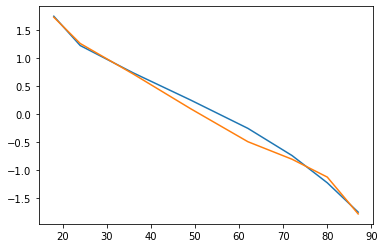

In [398]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train)
plt.plot(x_train, y_pred)